## MNIST

In [1]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_DATA/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [10]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000020ABA6CE588>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000020ABA6CE438>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000020ABA6CE630>)

In [2]:
import tensorflow as tf

nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [3]:
hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

In [4]:
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Instructions for updating:
Use `argmax` instead


In [5]:
training_epochs = 15
batch_size = 100

sess = tf.Session()
sess.run(tf.global_variables_initializer())


In [6]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size)   
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost,optimizer], feed_dict = {X: batch_xs, Y : batch_ys})
        avg_cost += c / total_batch
    print("Epoch:", "%04d" % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print("Accuracy: ", accuracy.eval(session = sess, feed_dict = {X : mnist.test.images, Y: mnist.test.labels}))    

Epoch: 0001 cost = 2.459055537
Epoch: 0002 cost = 1.053400438
Epoch: 0003 cost = 0.853315172
Epoch: 0004 cost = 0.752900055
Epoch: 0005 cost = 0.689766208
Epoch: 0006 cost = 0.644345420
Epoch: 0007 cost = 0.609855461
Epoch: 0008 cost = 0.581719028
Epoch: 0009 cost = 0.559457491
Epoch: 0010 cost = 0.539495705
Epoch: 0011 cost = 0.523063648
Epoch: 0012 cost = 0.508209064
Epoch: 0013 cost = 0.495266794
Epoch: 0014 cost = 0.483777874
Epoch: 0015 cost = 0.472920441
Accuracy:  0.8962


Label [0]
prediction: [0]


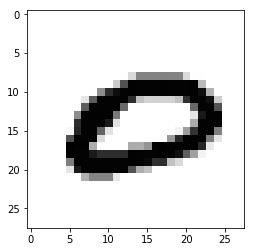

In [8]:
import matplotlib.pyplot as plt
import random
r = random.randint(0, mnist.test.num_examples - 1)
print("Label", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("prediction:", sess.run(tf.argmax(hypothesis, 1),
                                 feed_dict = {X:mnist.test.images[r:r+1]}))
plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap="Greys",
              interpolation='nearest')
plt.show()